## Recaptulando a última aula

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Carregar o dataset do Titanic
titanic = sns.load_dataset('titanic')

In [42]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [43]:
# Informações gerais do dataset
print(titanic.info())

# Descrição estatística do dataset
print(titanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

In [44]:
titanic[['sex', 'survived']].value_counts()

sex     survived
male    0           468
female  1           233
male    1           109
female  0            81
Name: count, dtype: int64

In [45]:
print(f'{109/(109+468)*100:.0f}% dos homens sobreviveu')
print(f'{233/(233+81)*100:.0f}% das melheres sobreviveu')

19% dos homens sobreviveu
74% das melheres sobreviveu


### Gráfico de Barras - Sobrevivência por Sexo

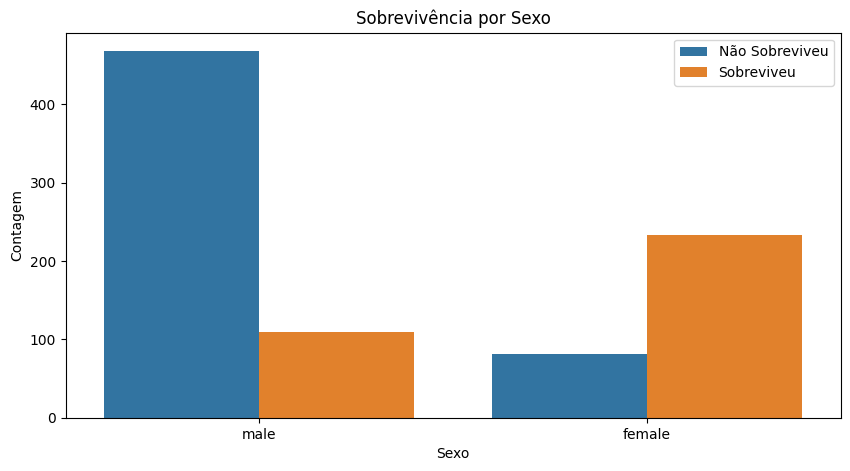

In [46]:
# Gráfico de Barras - Sobrevivência por Sexo
plt.figure(figsize=(10, 5))

sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.savefig('fig1.png', dpi=300)
plt.show()

### Correlação

In [47]:
df_num = titanic.select_dtypes(include=['float64', 'int64'])
correlacao = df_num.corr()
correlacao

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


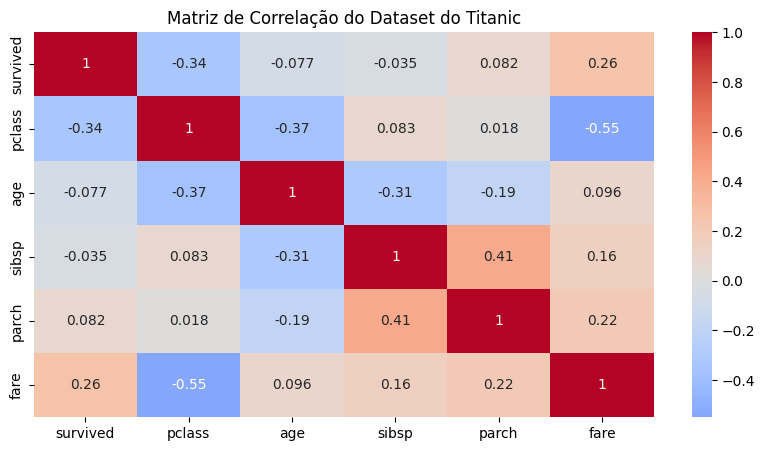

In [48]:
# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0 )
plt.title('Matriz de Correlação do Dataset do Titanic')
plt.show()

### Sobrevivência por idade

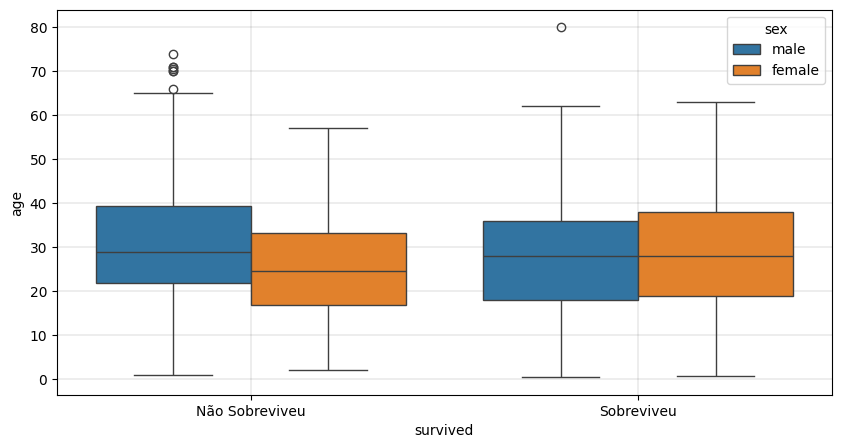

In [49]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=titanic, y='age', x='survived', hue='sex')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])

plt.grid(True, which='both', color='black', linewidth=0.1)

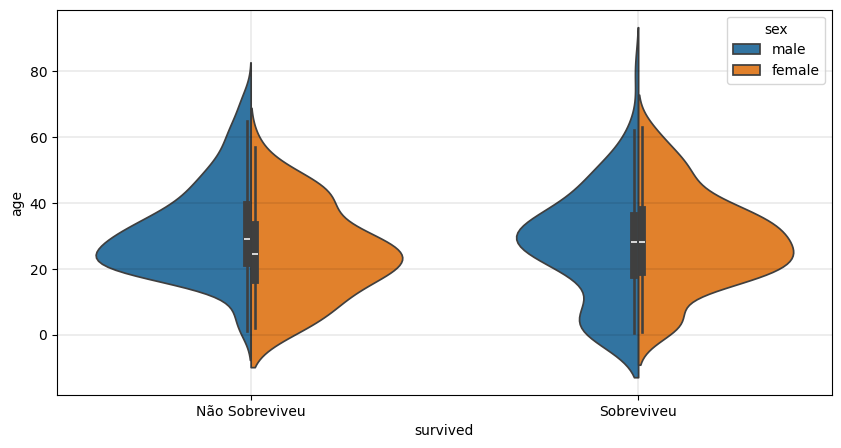

In [50]:
plt.figure(figsize=(10, 5))

sns.violinplot(data=titanic, y='age', x='survived', hue='sex', split=True)
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])

plt.grid(True, which='both', color='black', linewidth=0.1)
plt.savefig('fig3.png', dpi=300)

### Sobrevivência por Tamanho da Família

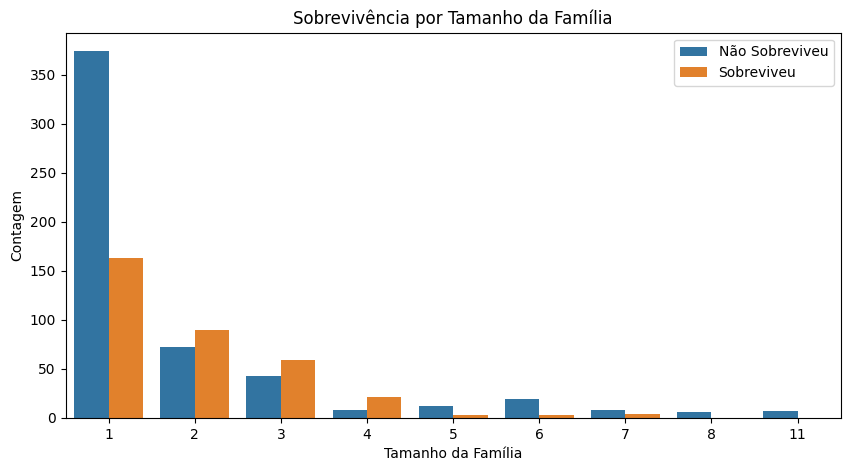

In [51]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

plt.figure(figsize=(10, 5))
sns.countplot(data=titanic, x='family_size', hue='survived')

plt.title('Sobrevivência por Tamanho da Família')
plt.xlabel('Tamanho da Família')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.savefig('fig4.png', dpi=300)
plt.show()

Colunas criadas a partir de Feature Engineering são altamente correlacionadas, porém não servirão para uma previsão

In [52]:
titanic.select_dtypes(include=['float64', 'int64']).corr()

,survived,pclass,age,sibsp,parch,fare,family_size
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
family_size,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


### FacetGrid

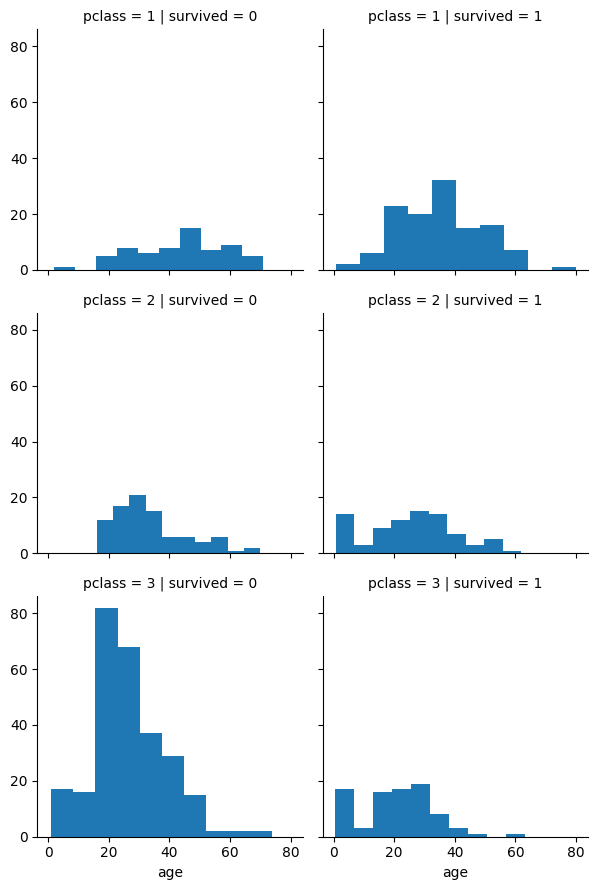

In [56]:
g = sns.FacetGrid(titanic, col='survived', row="pclass" )
g.map(plt.hist, "age", bins=10)
g.add_legend()
plt.show()

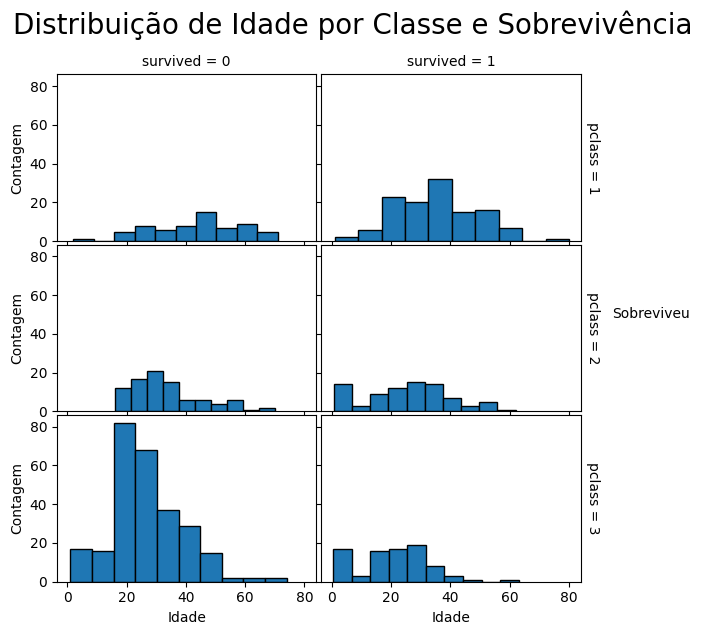

In [59]:
g = sns.FacetGrid(titanic, col='survived', row="pclass", height=2, aspect=1.5,
                  palette='Set2', margin_titles=True, despine=False)

# Map the plots
g.map(plt.hist, "age", bins=10, edgecolor="black")

# Add a title
g.fig.suptitle('Distribuição de Idade por Classe e Sobrevivência', size=20, y=1.05)

# Add labels
g.set_axis_labels('Idade', 'Contagem')

# Add a legend
g.add_legend(title='Sobreviveu')

# Add grid
g.fig.subplots_adjust(wspace=.02, hspace=.02)
#plt.grid(True, which='both', color='black', linewidth=0.1)

# Show the plot
plt.show()

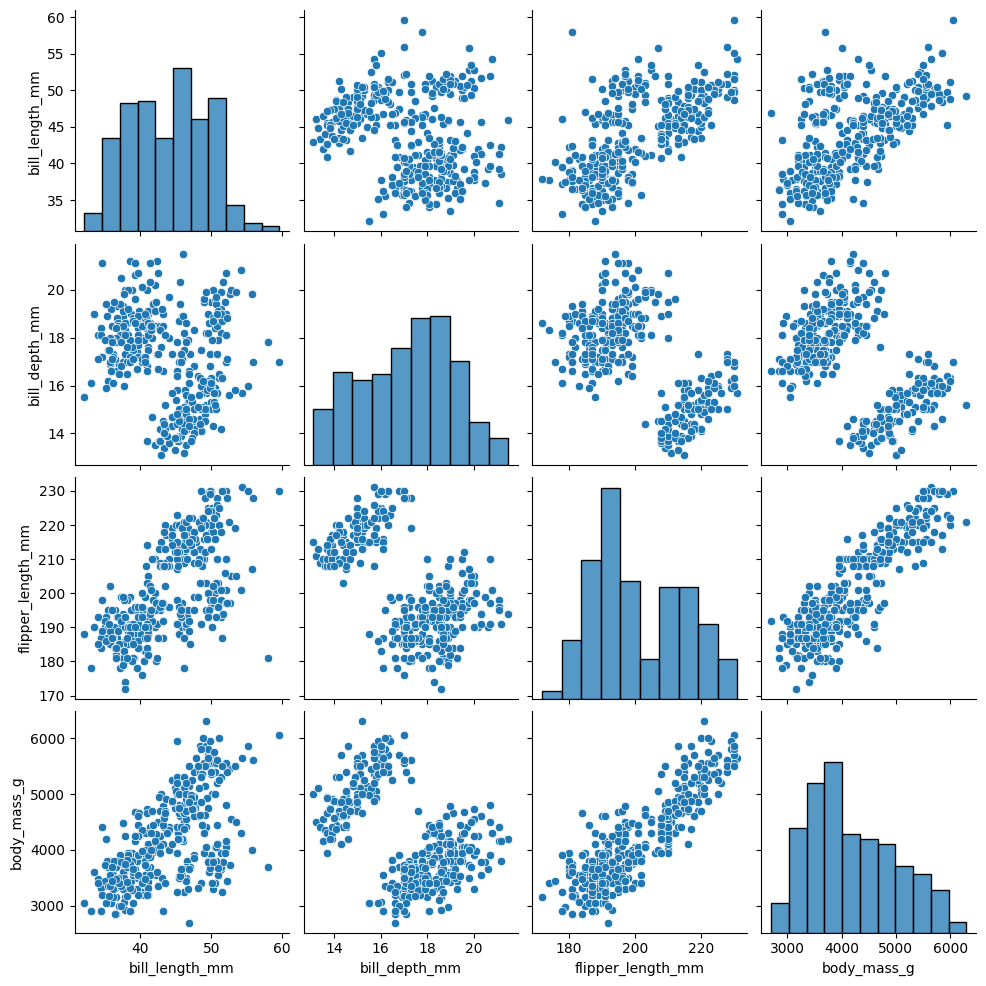

In [60]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

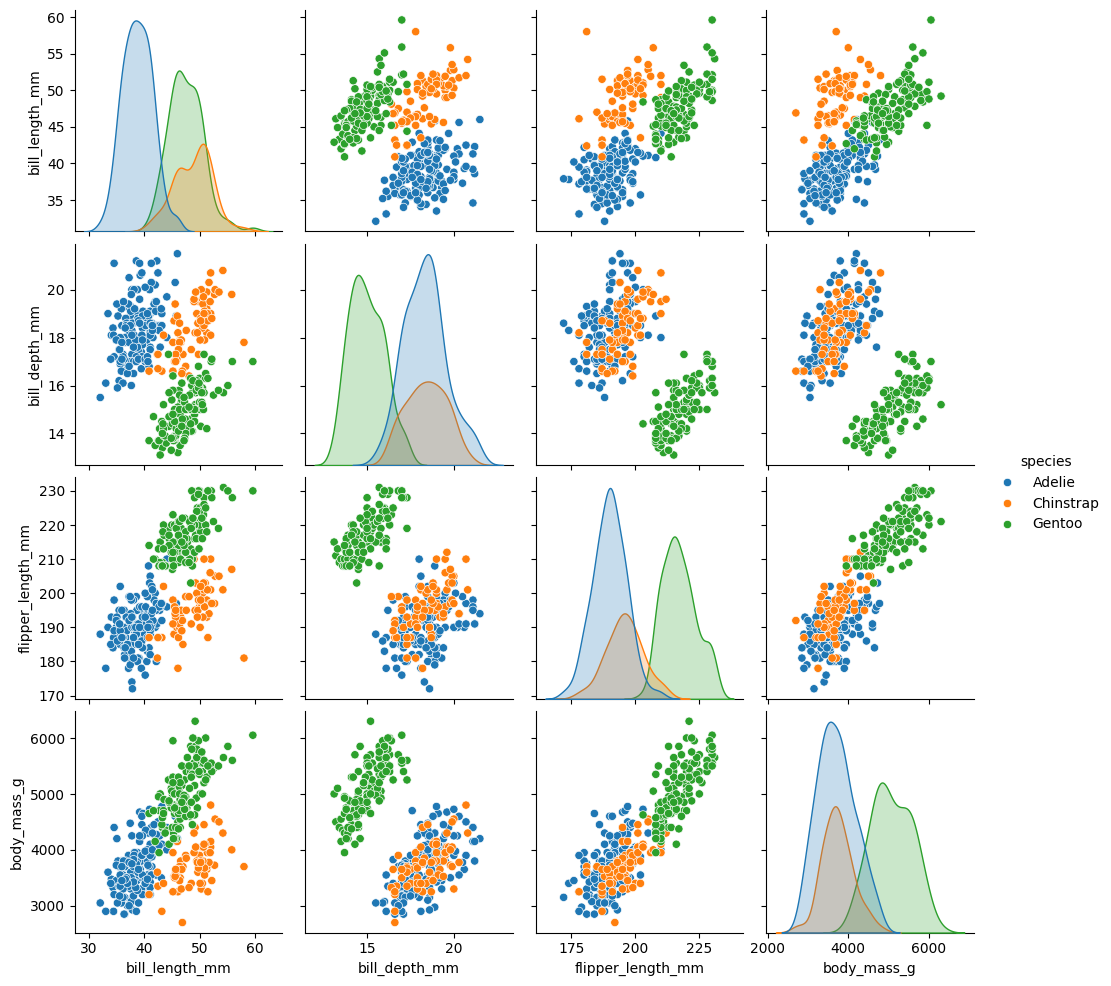

In [61]:
sns.pairplot(penguins, hue="species")

Para o titanic não ficou tão ilustrativo

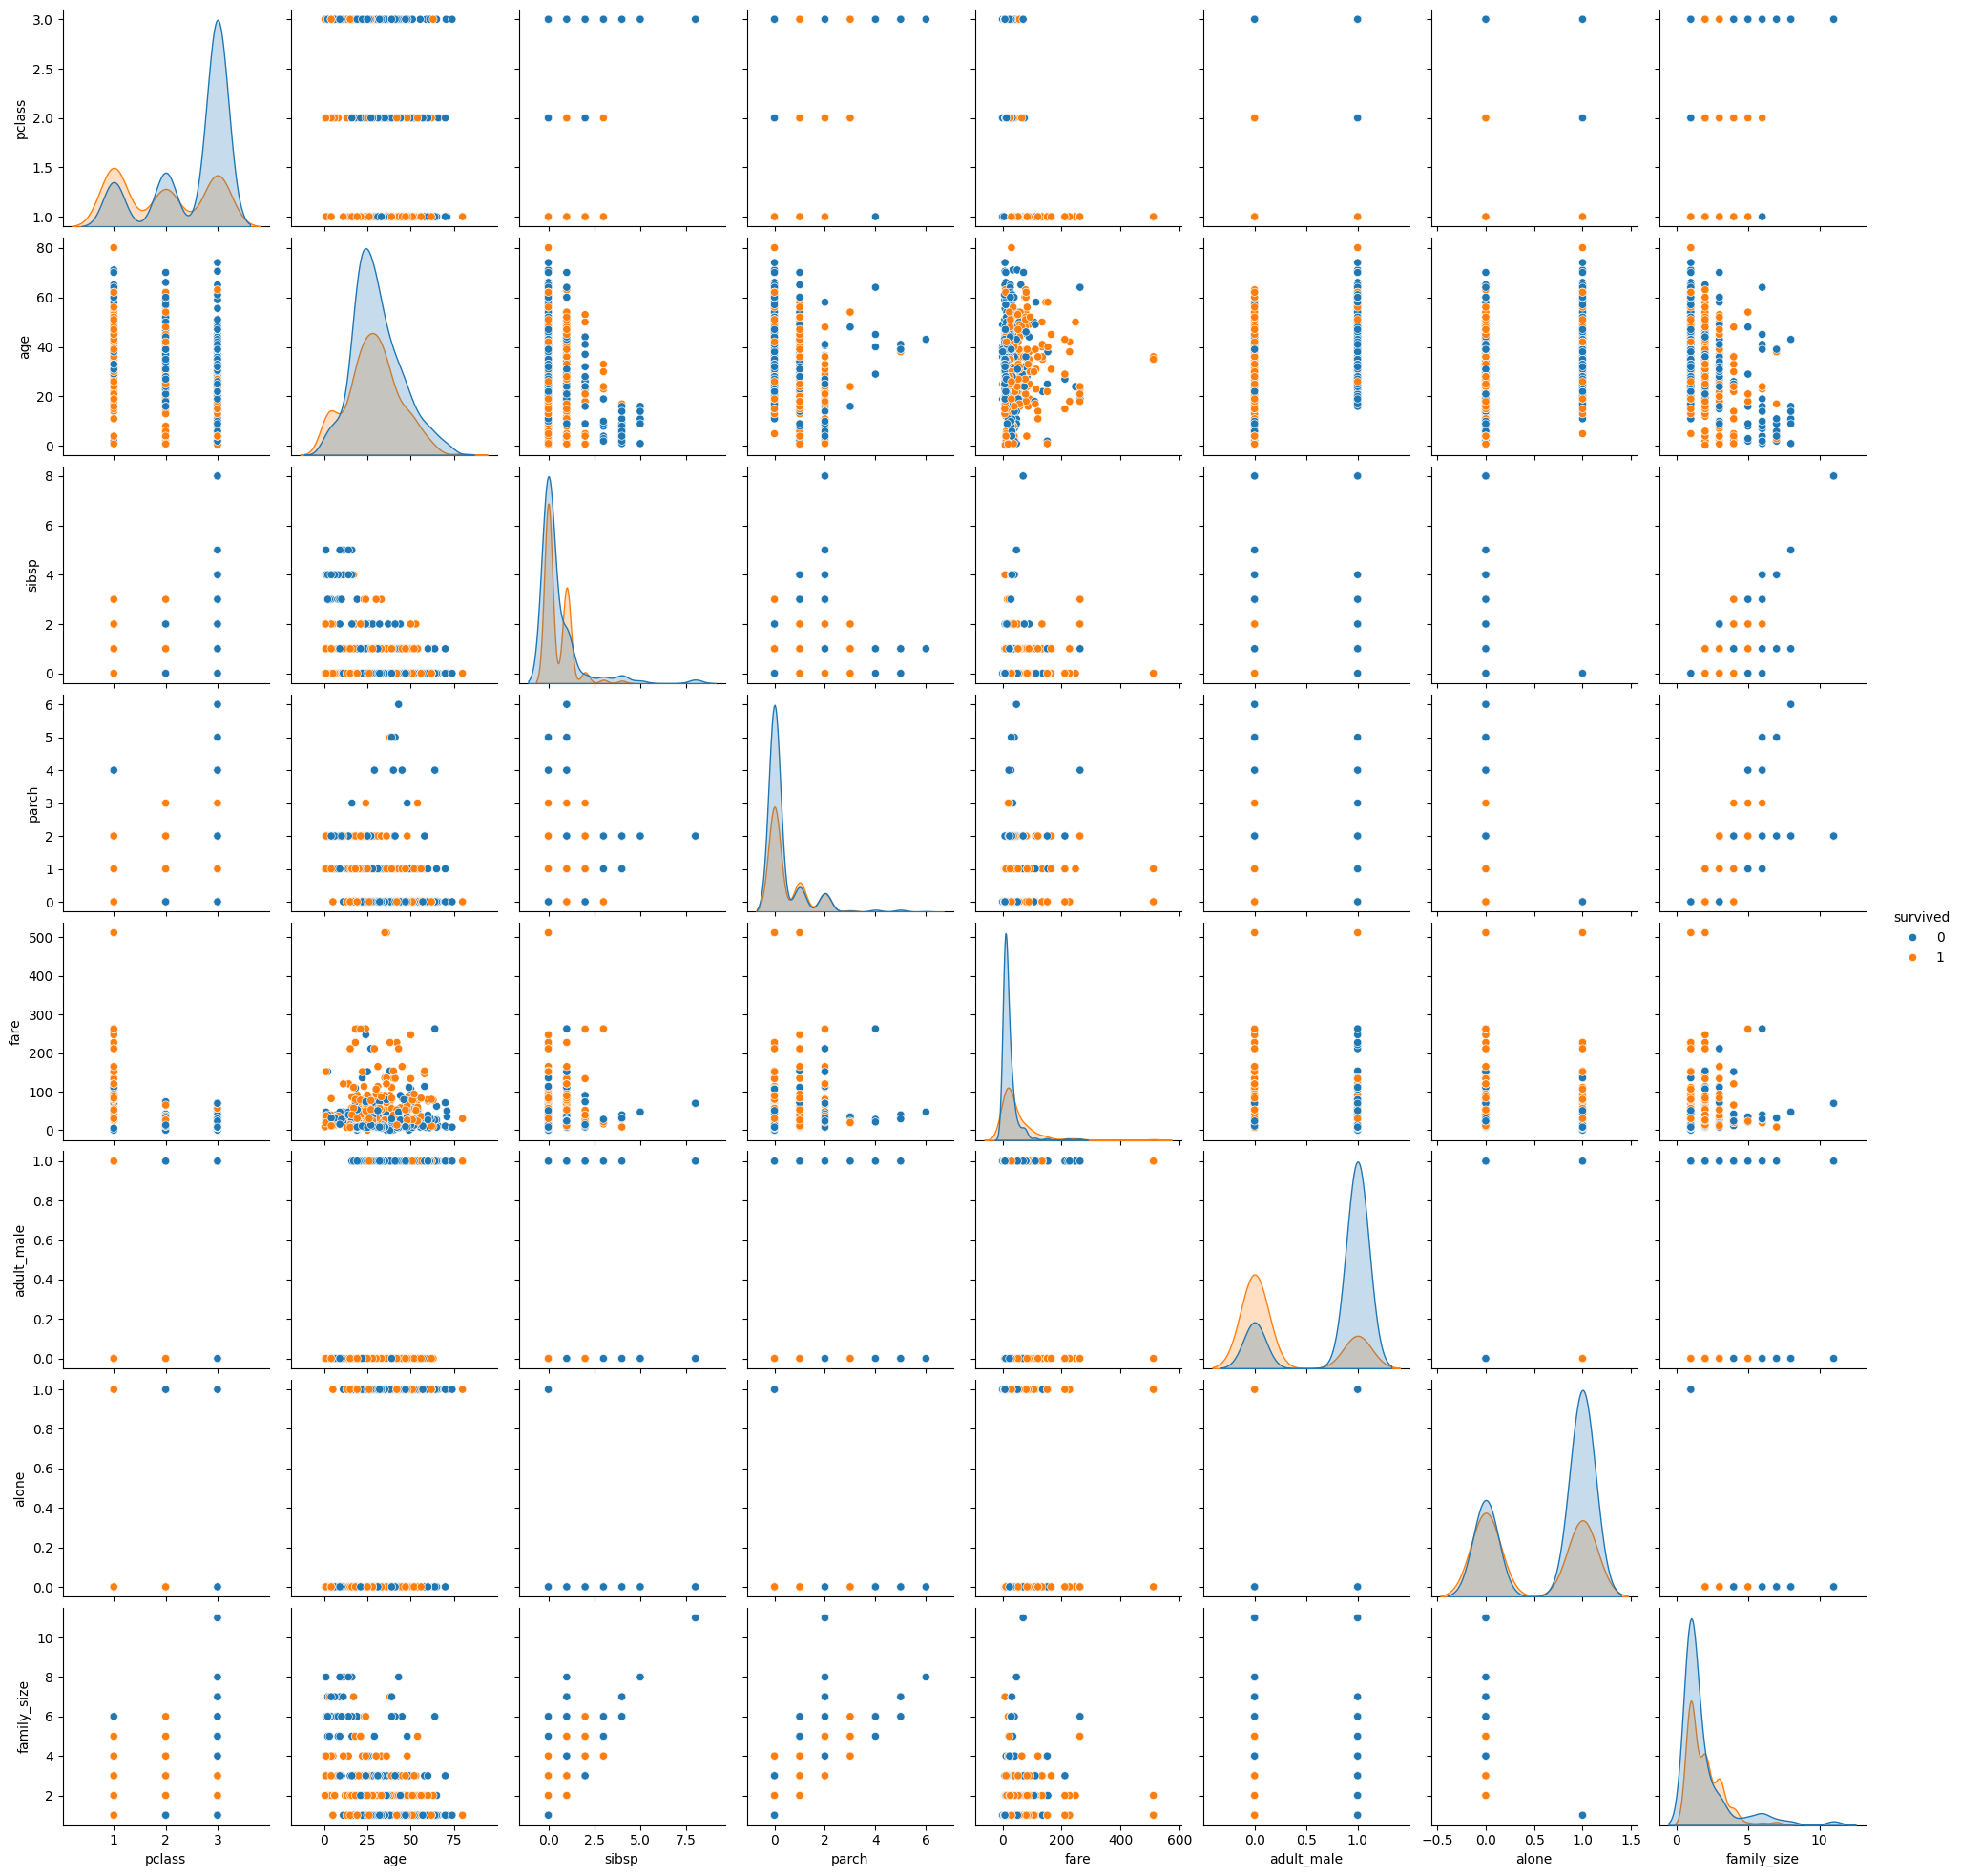

In [74]:
sns.pairplot(titanic, hue="survived")

Duvida Pedro Barenco

In [69]:
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [73]:
filtro = titanic['embark_town'].isin(['Southampton', 'Queenstown'])
titanic['embark_town'][filtro].unique()

array(['Southampton', 'Queenstown'], dtype=object)

---

### Usando plotly

In [78]:
import pandas as pd
import plotly.express as px
import plotly.io as py

In [79]:
fig = px.histogram(titanic, x="age", color="sex",
                   title="Distribuição de Idade por Gênero",
                   labels={"age": "Idade", "sex": "Gênero"},
                   nbins=30,
                   marginal="box", # Adiciona boxplot ao histograma
                   hover_data=titanic.columns)

fig.update_layout(bargap=0.2)

py.write_html(fig, 'output.html')

fig.show()


In [80]:
fig = px.bar(titanic, x="class", y="survived",
             color="sex",
             title="Taxa de Sobrevivência por Classe e Gênero",
             labels={"class": "Classe", "survived": "Taxa de Sobrevivência"},
             barmode="group",
             hover_data=titanic.columns)

fig.update_layout(yaxis=dict(tickformat=".0%"))
fig.show()


In [84]:
corr = correlacao

fig = px.imshow(corr,
                title="Mapa de Calor das Correlações entre Variáveis",
                labels={"color": "Correlação"},
                x=corr.columns,
                y=corr.columns,
                color_continuous_scale="RdBu_r",
                zmin=-1, zmax=1)

fig.show()
